In [24]:
# Install Java and Spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# Set up environment variables for Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# Install findspark
!pip install -q findspark

# Initialize PySpark
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()


In [3]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [25]:
# Load the dataset
df = spark.read.csv(dataset_path, header=True, inferSchema=True)

# Show the first few rows of the dataset
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



**Vector Assembler**

In [26]:
from pyspark.ml.feature import VectorAssembler

# Exclude the target column 'medv'
feature_columns = [col for col in df.columns if col != 'medv']

# Combine feature columns into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_vector = assembler.transform(df)
df_vector.show(5)


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
only showing top 5 rows



**Standardize features for Principal Component Analysis**

In [27]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)
scaler_model = scaler.fit(df_vector)
df_scaled = scaler_model.transform(df_vector)
df_scaled.show(5)


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|     scaled_features|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|[7.34751712931429...|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|[0.00317501096205...|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|[0.00317268579840...|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|[0.00376327736512...|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|[0.00802762749

**Train PCA Model**

In [28]:
from pyspark.ml.feature import PCA

pca = PCA(k=2, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(df_scaled)
df_pca = pca_model.transform(df_scaled)
df_pca.show(5)


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+--------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|     scaled_features|        pca_features|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|[7.34751712931429...|[-1.2551263234672...|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|[0.00317501096205...|[-1.8955383642584...|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|[0.00317268579840...|[-1.2788028017576...|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|[0.00376327736

**Convert to Pandas**

In [29]:
import numpy as np
import pandas as pd

pca_features = np.array(df_pca.select("pca_features").collect())
pca_features = np.array([x[0] for x in pca_features])

df_pca_pd = pd.DataFrame(pca_features, columns=["Principal Component 1", "Principal Component 2"])
df_pca_pd.head()


,Principal Component 1,Principal Component 2
0,-1.255126,0.619209
1,-1.895538,0.438260
2,-1.278803,0.445907
3,-0.742428,-0.160003
4,-0.895595,-0.055524


**Plot PCA**

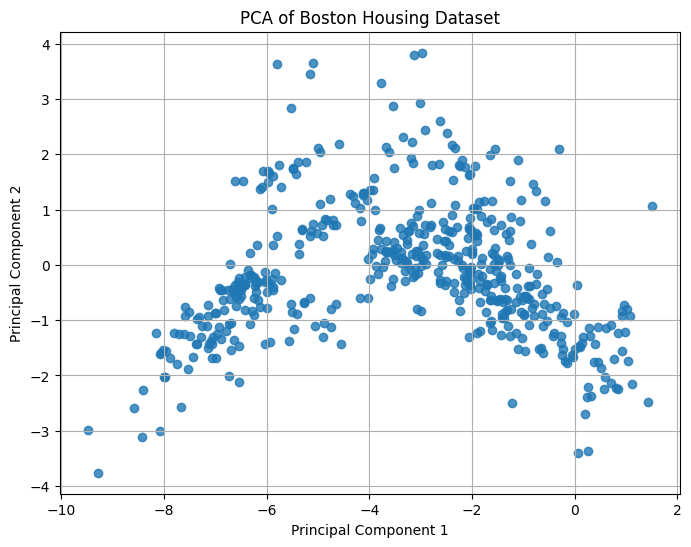

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_pd["Principal Component 1"], df_pca_pd["Principal Component 2"], alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Boston Housing Dataset")
plt.grid(True)
plt.show()

**Vectorize Features and Label**

In [31]:
from pyspark.ml.linalg import DenseVector
from pyspark.sql.functions import col

df_vectorized = df.select(feature_columns + ["medv"]) \
                  .rdd.map(lambda row: [DenseVector(row[:-1]), row[-1]]) \
                  .toDF(["features", "label"])
df_vectorized.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.00632,18.0,2.3...| 24.0|
|[0.02731,0.0,7.07...| 21.6|
|[0.02729,0.0,7.07...| 34.7|
|[0.03237,0.0,2.18...| 33.4|
|[0.06905,0.0,2.18...| 36.2|
+--------------------+-----+
only showing top 5 rows



**Data Splitting**

In [43]:
train_df, test_df = df_vectorized.randomSplit([0.8, 0.2], seed=44)

**Fit Linear Regression**

In [44]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol="features", labelCol="label")
lr_model = lr.fit(train_df)

**Model Coefficients**

In [45]:
print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")

Coefficients: [-0.1116670187241683,0.045519005980665175,0.01284322613871985,2.487343277136282,-16.06801002340716,4.162717693426486,-0.0035843230233008317,-1.5381605521640567,0.29920588360328587,-0.01282635361031973,-0.8961850937396715,0.012599113948043266,-0.48909283493196787]
Intercept: 31.473382089559898


**Evaluate Model**

In [46]:
test_results = lr_model.evaluate(test_df)

print(f"RMSE: {test_results.rootMeanSquaredError}")
print(f"R2: {test_results.r2}")

RMSE: 5.109443525340295
R2: 0.7020369584186872


**Further Analysis**

+------------------+-----+--------------------+
|        prediction|label|            features|
+------------------+-----+--------------------+
|   31.436816459994| 32.2|[0.00906,90.0,2.9...|
| 32.55808745660742| 31.6|[0.01432,100.0,1....|
|27.194352280809337| 24.5|[0.01501,80.0,2.0...|
| 44.47741307604679| 50.0|[0.01501,90.0,1.2...|
|37.311223448186695| 44.0|[0.01538,90.0,3.7...|
+------------------+-----+--------------------+
only showing top 5 rows



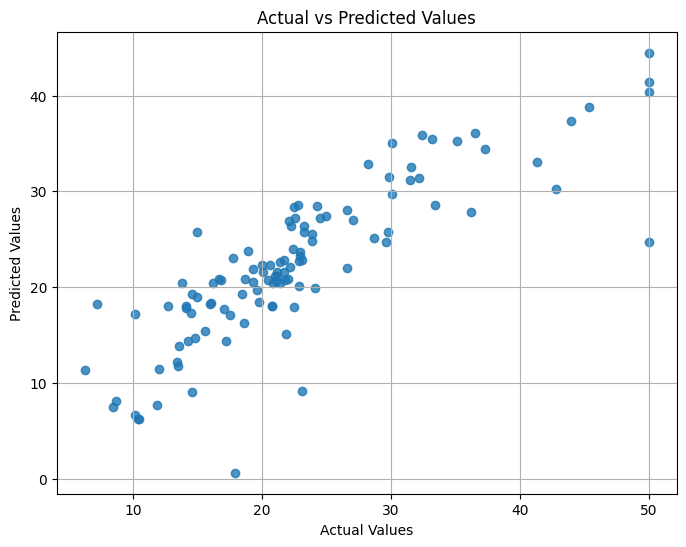

In [47]:
# Make predictions on the test dataset
predictions = lr_model.transform(test_df)
predictions.select("prediction", "label", "features").show(5)

# Plot actual vs predicted values
predictions_pd = predictions.select("prediction", "label").toPandas()

plt.figure(figsize=(8, 6))
plt.scatter(predictions_pd["label"], predictions_pd["prediction"], alpha=0.8)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()